In [ ]:
! pip install importlib-metadata==4.13.0
! pip install xarray==0.20.1

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.1
    Uninstalling importlib-metadata-7.0.1:
      Successfully uninstalled importlib-metadata-7.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.7/835.7 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires xarray>=0.21.0, but you have xarray 0.20.1 which is incompatible.
xarray-einstats 0.7.0 requires xarray>=2022.09.0, but you have xarray 0.20.1 which is incompatible.


In [ ]:
! pip install --upgrade xarray zarr gcsfs cftime nc-time-axis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 16.5 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5033 sha256=c3e9969651ac3d1d8ac77127d2496085d3581fb464c02a5d616f2e58557bcb1c
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
  Attempting uninstall: xarray
    Found existing installation: xarray 0.20.1
    Uninstalling xarray-0.2

In [ ]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.5 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import xarray as xr
import sys
#import netCDF4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# plotting parameters
color_list = ['#000000', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#D55E00', '#CC79A7'] * 2
marker_list = ['o', 's', 'P', '+', 'D', 'v', '3', 'm'] * 2
markersize = 6
linewidth = 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
cdds_params={'axes.linewidth': 3,
 'axes.axisbelow': False,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'axes.titlesize': 20,
 'axes.labelsize': 20,
 'axes.titlelocation': 'left',
 'figure.facecolor': 'white',
 'figure.figsize': (18, 10),
 'lines.solid_capstyle': 'round',
 'lines.linewidth': 2.5,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'legend.frameon': False,
 'xtick.bottom': True,
 'xtick.major.width': 3,
 'xtick.major.size': 6,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False,
 'ytick.color' : 'black',
 'ytick.major.width': 3,
 'ytick.major.size': 6,
 'axes.prop_cycle': plt.cycler(color=color_list),
 'font.size': 16,
 'font.family': 'serif'}
plt.rcParams.update(cdds_params)

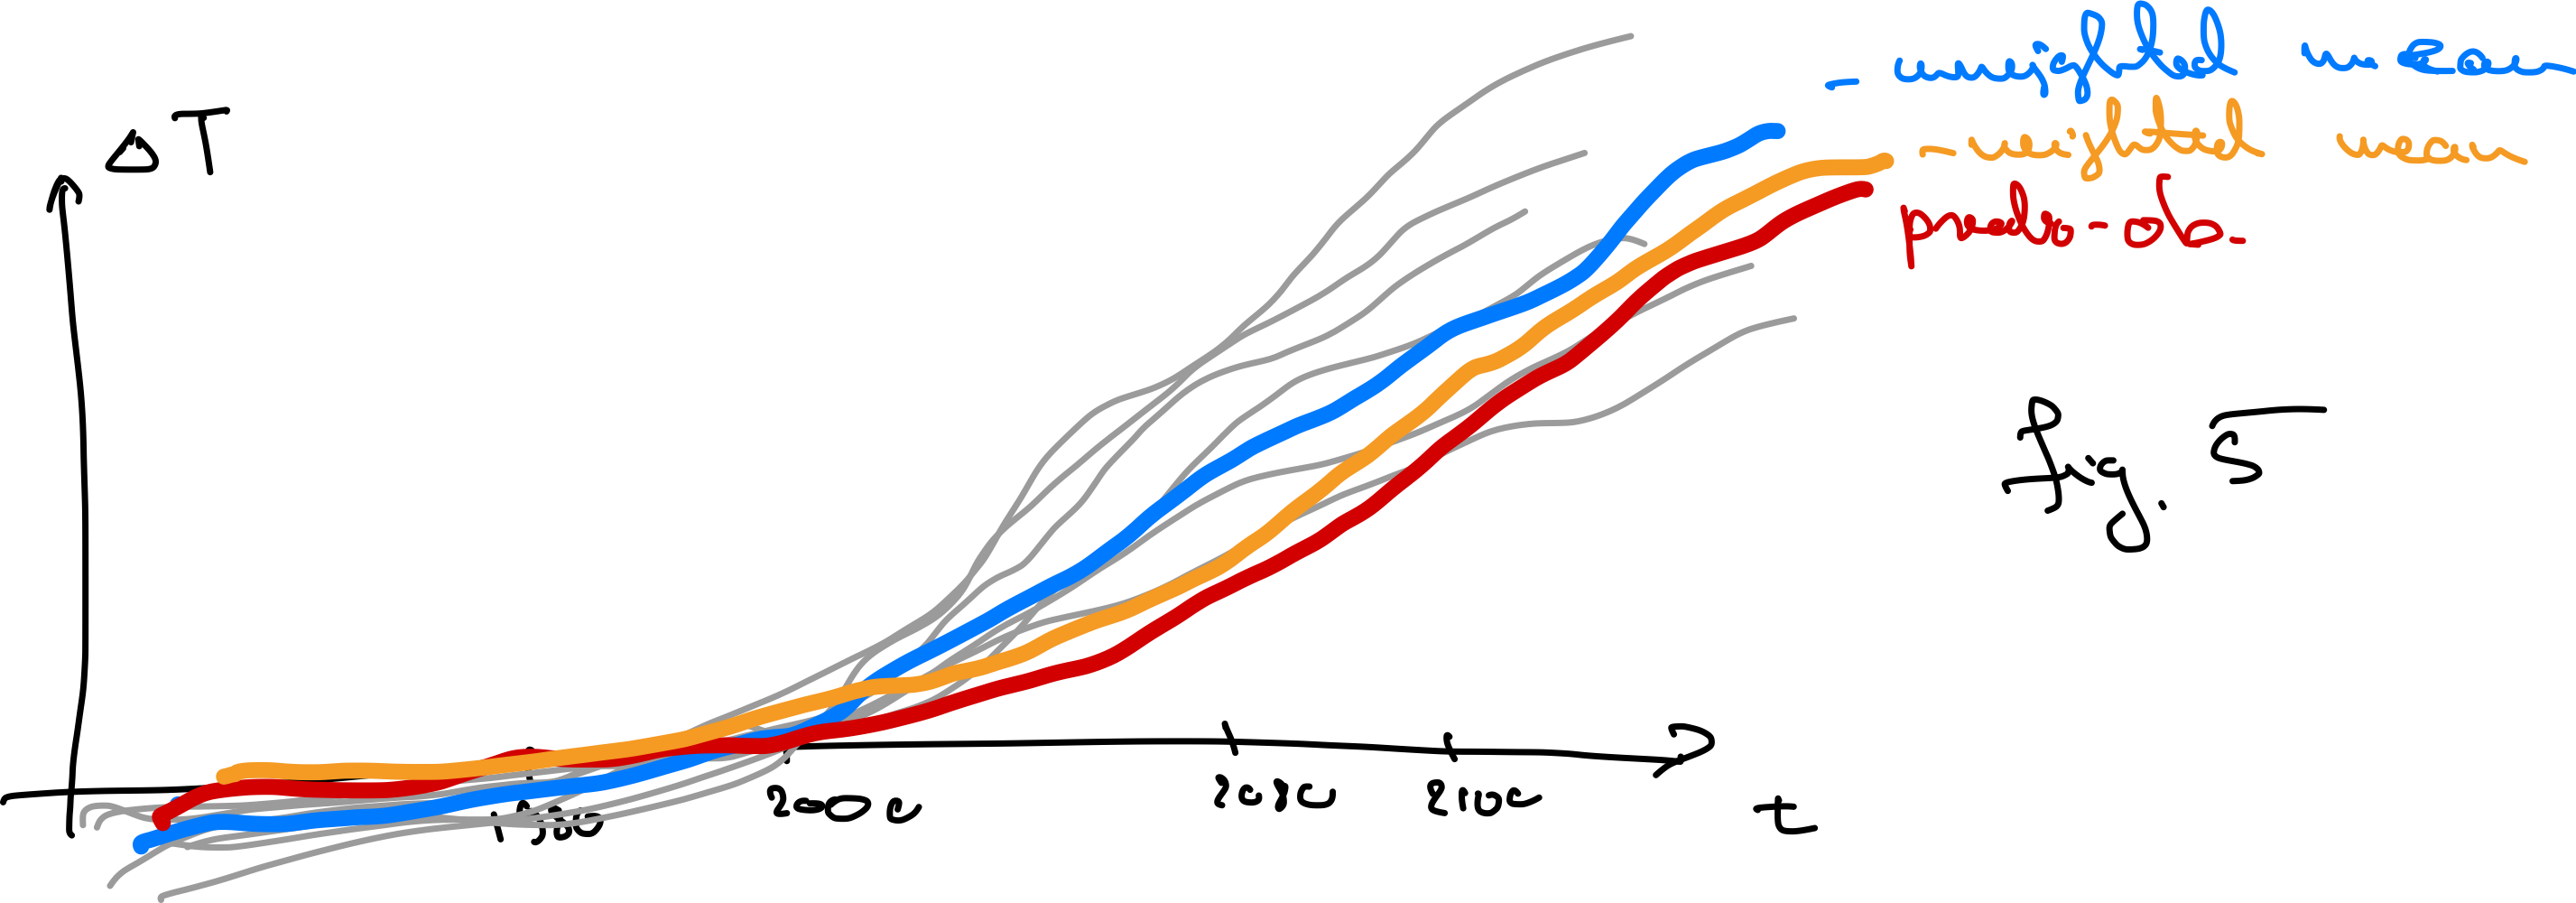

Load data

In [ ]:
#ds=xr.open_dataset('/content/drive/MyDrive/CDDS/CDDS_Abby_McDonnell/Code/global_data_processed_precip.nc')
ds=xr.open_dataset('/content/drive/MyDrive/global_data_processed_precip.nc')
ds.load()


<xarray.Dataset> Size: 647kB
Dimensions:  (model: 26, time: 2988)
Coordinates:
  * model    (model) <U16 2kB 'CanESM5' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'
  * time     (time) datetime64[ns] 24kB 1851-01-31 1851-02-28 ... 2099-12-31
Data variables:
    pr       (model, time) float64 622kB 3.292e-05 3.256e-05 ... 3.435e-05

Load Weights Data

In [ ]:
weights_save  = xr.open_dataarray('weights_temperature_reformatted.nc')
weights_save.load()

<xarray.DataArray 'weights' (pseudo_dropped: 26, models: 25)> Size: 5kB
array([[1.42084854e-003, 2.05516565e-001, 4.92926630e-002,
        3.73825032e-006, 3.17259635e-006, 9.16952319e-017,
        3.96682663e-003, 2.81632604e-003, 1.10582957e-003,
        3.09912032e-008, 2.47730126e-012, 2.23686877e-010,
        1.37789001e-010, 4.39175786e-001, 7.14117607e-011,
        4.46506132e-009, 7.67953967e-003, 2.51068217e-001,
        4.18251004e-003, 9.65884884e-010, 3.61196560e-012,
        2.25945162e-002, 1.97701257e-004, 1.09757231e-002,
        2.26988356e-010],
       [1.00648675e-017, 1.16830873e-005, 4.07291848e-003,
        8.77739812e-004, 6.75358513e-004, 2.96248145e-032,
        1.60181661e-001, 1.84783072e-001, 2.03169127e-001,
        8.81978270e-008, 2.15061366e-018, 5.55543464e-013,
        1.54553290e-013, 3.18265506e-031, 2.65657214e-014,
        1.02211869e-009, 1.00183914e-001, 3.25841370e-006,
        1.55779916e-001, 2.38687372e-011, 6.39106032e-018,
        2.35754679e-002, 9.78274773e-002, 6.88583166e-002,
        5.77310977e-013],
       [1.37453030e-002, 1.03541750e-002, 2.35124557e-001,
        6.30158074e-006, 5.03380352e-006, 1.55194814e-022,
...
        1.86606510e-008, 1.20354835e-002, 3.49460727e-002,
        5.62463463e-006],
       [1.49392592e-012, 6.78004839e-002, 2.74493900e-003,
        8.45992263e-002, 2.35237898e-006, 1.61636076e-006,
        4.20613381e-040, 1.49673972e-001, 1.20645714e-001,
        5.25436873e-002, 1.14128118e-011, 2.18545190e-024,
        4.95475643e-018, 1.07932477e-018, 5.29280716e-024,
        1.33735401e-019, 4.42612603e-014, 1.93412247e-001,
        1.16625686e-003, 1.54011672e-001, 4.53640462e-016,
        7.72745232e-024, 1.68001120e-001, 5.39671290e-003,
        5.18735433e-018],
       [6.63984759e-042, 6.39593924e-010, 2.92335051e-023,
        1.19169578e-017, 5.27376396e-004, 6.61346835e-004,
        7.16996547e-005, 1.21659982e-011, 4.94020241e-011,
        1.52142867e-009, 4.88097875e-002, 7.37129502e-002,
        1.77193157e-001, 1.75144035e-001, 7.86307573e-059,
        1.66610958e-001, 1.12976869e-001, 6.28325732e-013,
        2.58610557e-024, 9.72072681e-012, 1.59940231e-001,
        8.43513396e-002, 1.98726063e-015, 2.47862937e-007,
        1.07539193e-013]])
Dimensions without coordinates: pseudo_dropped, models

## Remove Seasonal Cycle

Removing seasonal variablilty, so we can use a dataset with just anomolies


In [ ]:
def remove_time_mean(x):
    return x - x.mean(dim='time')

ds = ds.groupby('time.month').apply(remove_time_mean)
ds

<xarray.Dataset> Size: 647kB
Dimensions:  (model: 26, time: 2988)
Coordinates:
  * model    (model) <U16 2kB 'CanESM5' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'
  * time     (time) datetime64[ns] 24kB 1851-01-31 1851-02-28 ... 2099-12-31
Data variables:
    pr       (model, time) float64 622kB -9.814e-07 -1.007e-06 ... 1.386e-06

In [ ]:
pseudo = ds.pr[20].sel(time=slice('2020', '2099')).values - ds.pr[20].sel(time=slice('1960', '2014')).mean(dim='time').values

all = ds.pr.sel(time=slice('2020', '2099')).values - ds.pr.sel(time=slice('1960', '2014')).mean(dim='time').values[:, None]

In [ ]:
W=list()
RMSE=list()
UW=list()

#select the pseudo's weights
weights=weights_save[20,:]

#select pseudo
ds_obs=ds.isel(model=20)

#select everything but pseudo
v=np.delete(np.arange(26), 20)
ds_gcm=ds.isel(model=v)

#apply weights
weights = xr.DataArray(weights_save[20,:], dims=["model"])

ds_gcm_weighted = (ds_gcm.pr * weights).sum(dim="model")

ds_gcm_weighted = ds_gcm_weighted.sel(time=slice('2020', '2099')).values - ds_gcm_weighted.sel(time=slice('1960', '2014')).mean(dim='time').values

In [ ]:
#update years for plotting purposes
years = ds.time.sel(time=slice('2020', '2100')).values
years = years.astype('datetime64[Y]')

smaller = np.arange(0, len(years), 120)
if smaller[-1] != len(years) - 1:
    smaller = np.append(smaller, len(years) - 1)

selected_years = [years[i] for i in smaller]




##Figure 1b: Models with unweighted mean, weighted mean, and pseudo observation between 1980-2099


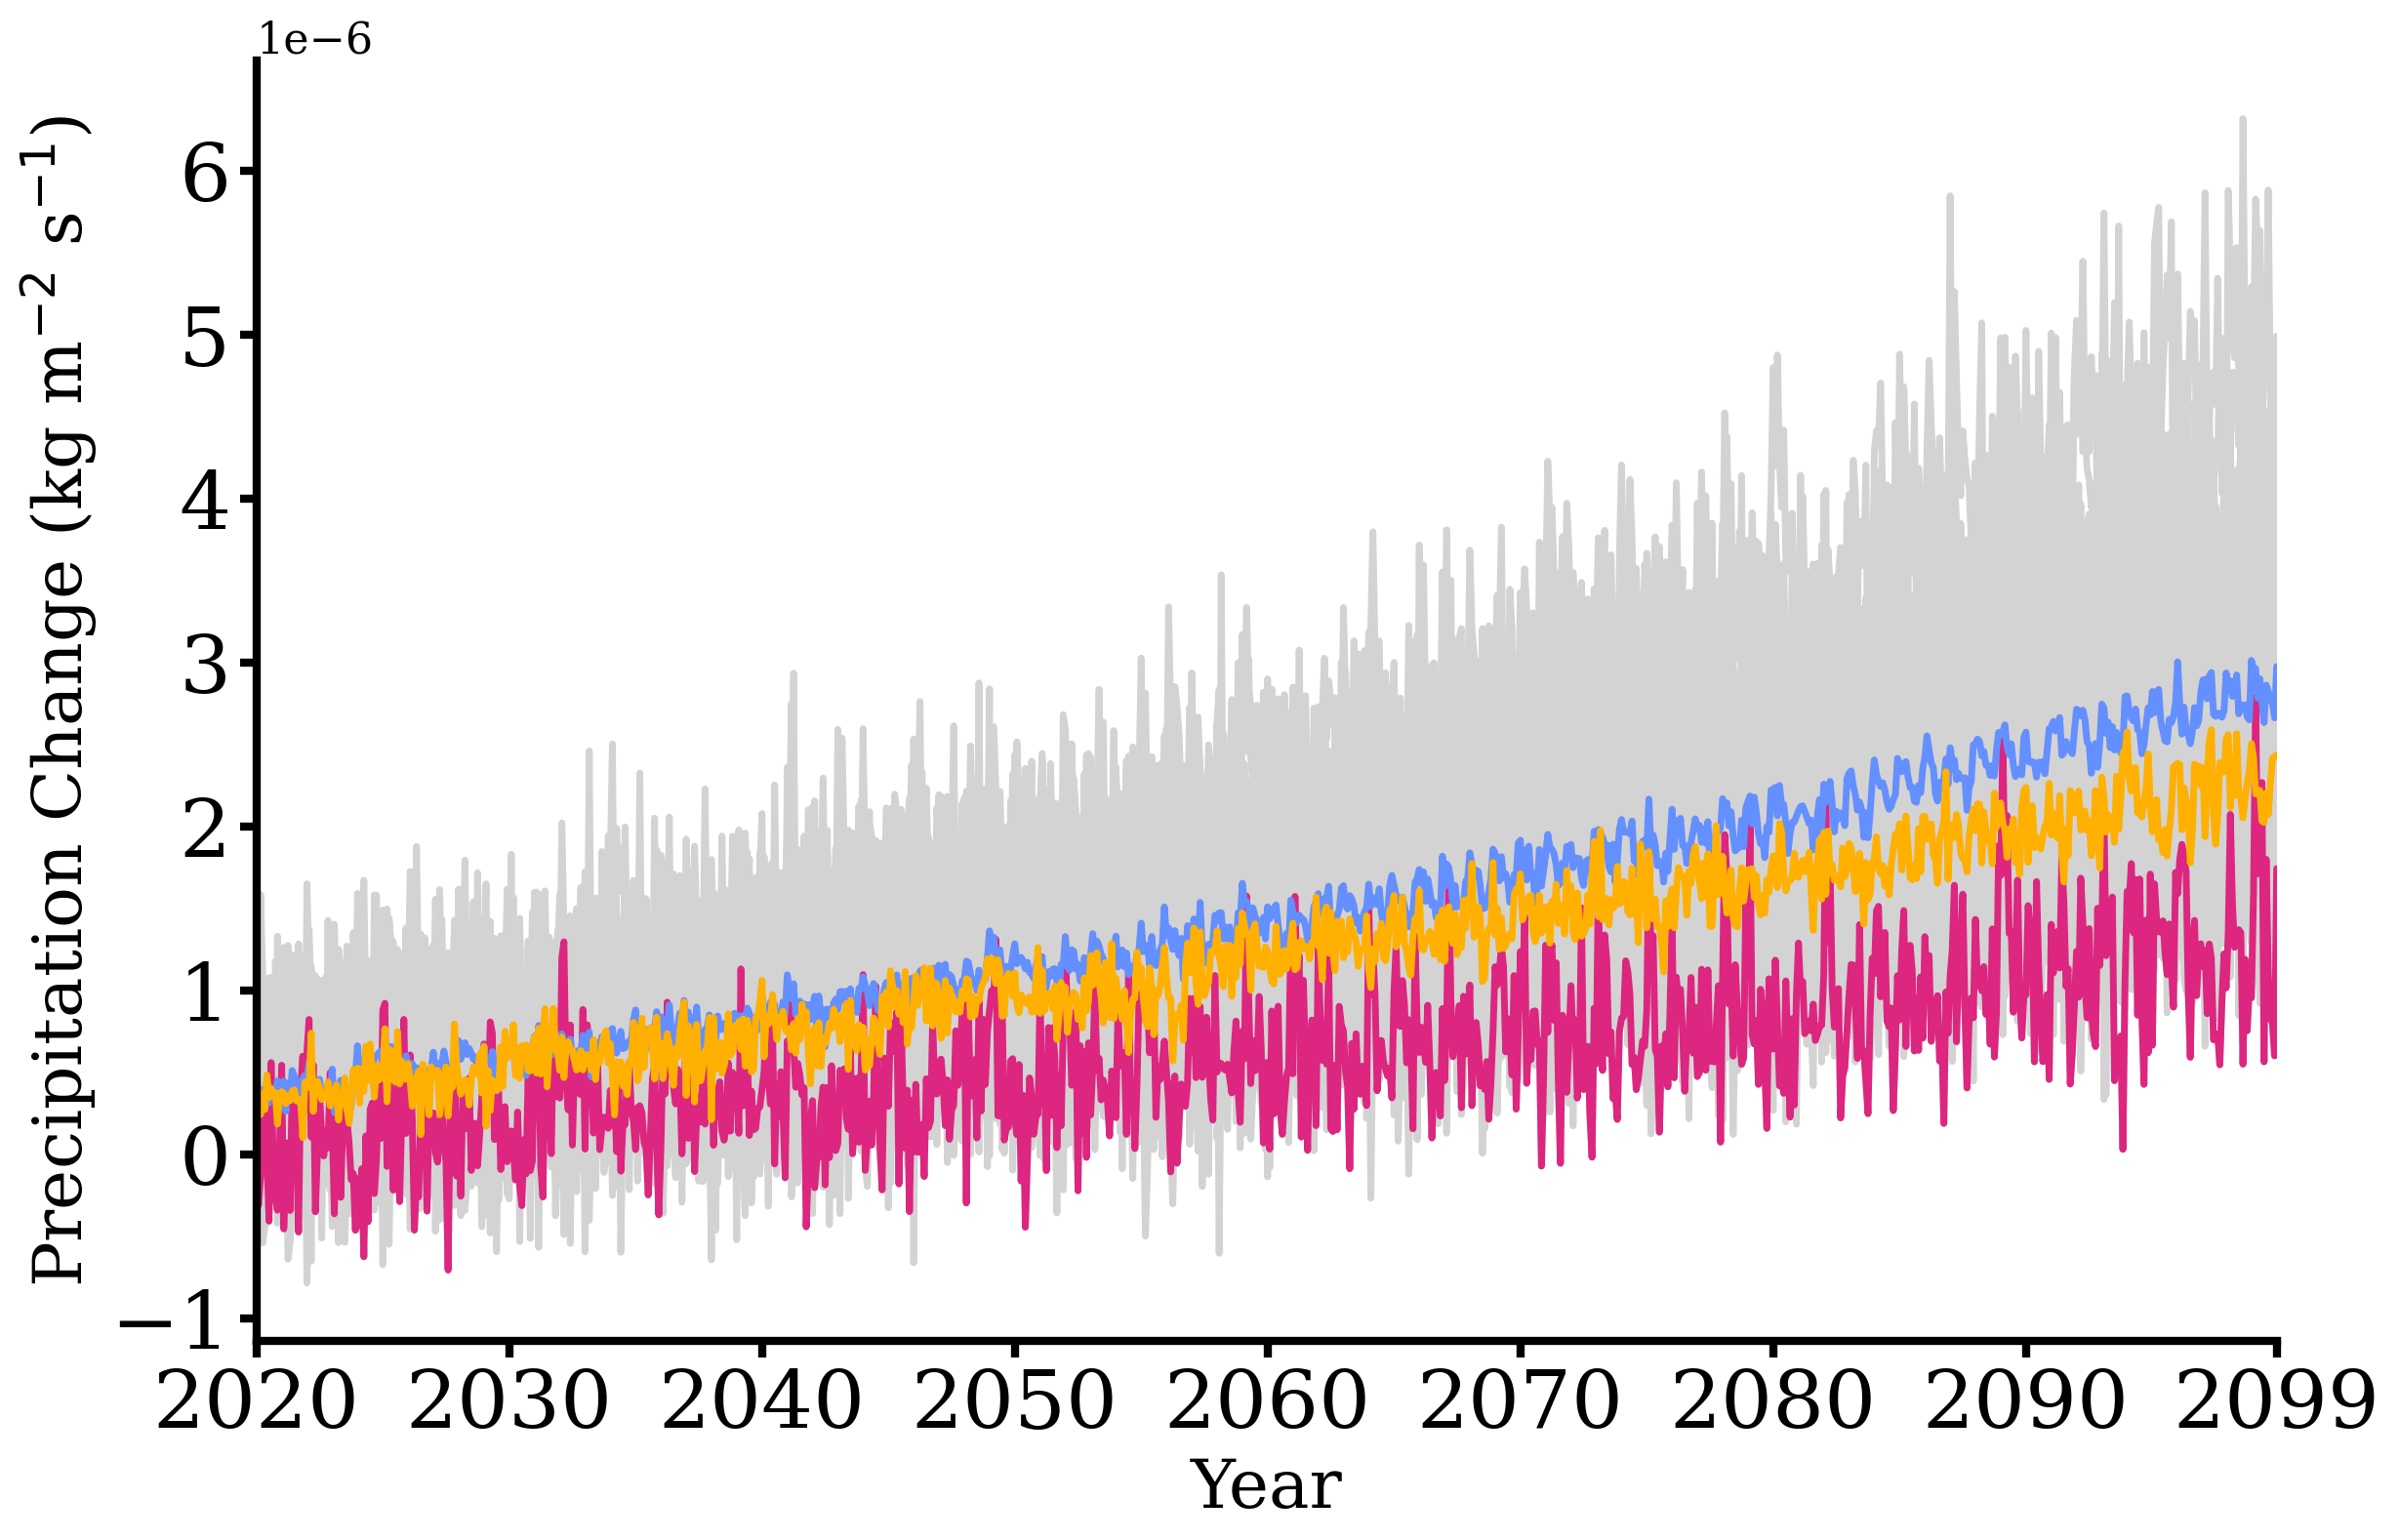

In [ ]:

fig, ax = plt.subplots(figsize=(12, 8))

#plot overall time period, weighted mean, unweighted mean, psuedo-obs, and trendline
for i in range(len(ds.pr.model)) :
  ax.plot(all[i], color='lightgray', linestyle='-')

#plot pseudo-observation in red (first model chosen for the example)
ax.plot(pseudo, color='#DC267F', label='pseudo-observation', linestyle='-')
#plot unweighted mean in blue
ax.plot(all.mean(axis=0), label="unweighted mean", color='#648FFF', linestyle='-')
#plot weighted mean in yellow
ax.plot(ds_gcm_weighted, label="weighted mean", color='#FFB000', linestyle='-')
#labels
# plt.xlabel("Year", fontsize = 30) ;

plt.xlabel("Year", fontsize = 25)
plt.ylabel("Precipitation Change (kg m$^{-2}$ s$^{-1}$)", fontsize = 25)


plt.tight_layout()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


ax.set_xlim(0, 660)

ax.set_xticks(smaller)
ax.set_xticklabels(selected_years)

# ax.legend(fontsize = 30)
plt.savefig('example_precip.png')